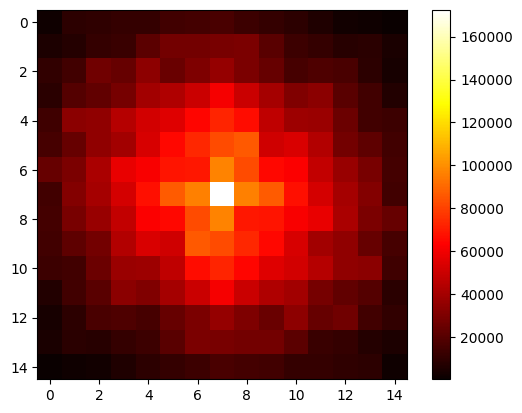

In [4]:
## implementasi correlogram 2D dengan generate data random

import numpy as np 
import matplotlib.pyplot as plt 

# generate data random
data = np.random.randint(1, 100, size=(8, 8))

# hitung correlogram 2D
rows, cols = data.shape
correlogram = np.zeros((2 * rows - 1, 2 * cols - 1))

for u in range(-(rows - 1), rows):
    for v in range(-(cols - 1), cols):
        sum = 0
        for i in range(rows):
            for j in range(cols):
                x_shift = i + u
                y_shift = j + v
                if 0 <= x_shift < rows and 0 <= y_shift < cols:
                    sum += data[i, j] * data[x_shift, y_shift]
        correlogram[u + rows - 1, v + cols - 1] = sum 

# plot correlogram 2D
plt.imshow(correlogram, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

## comparing if i used function correlogram dari scipy

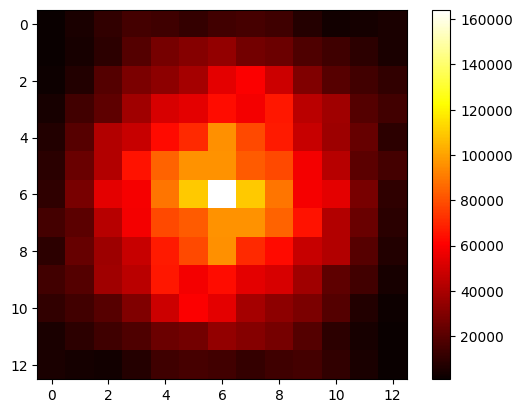

In [3]:
from scipy.signal import correlate2d

# hitung correlogram use the same dataset
correlogram_sci = correlate2d(data, data, mode='full')

# plot correlogram 2D
plt.imshow(correlogram_sci, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

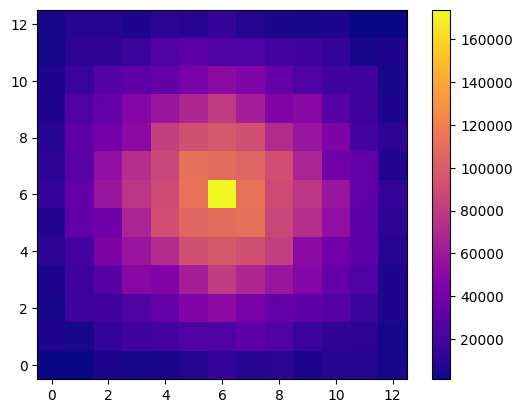

In [7]:
## implementasi correlogram 2D dengan generate data random

import numpy as np 
import matplotlib.pyplot as plt 

# generate data random
data = np.array([
    [14,11,51,33,7,31,85],
    [65,24,79,97,35,63,46],
    [34,98,63,29,63,94,38],
    [6,98,16,89,92,71,60],
    [41,38,94,100,33,23,67],
    [17,52,11,25,62,91,1],
    [52,79,62,17,51,11,97]
    ])

# hitung correlogram 2D
rows, cols = data.shape
correlogram = np.zeros((2 * rows - 1, 2 * cols - 1))

for u in range(-(rows - 1), rows):
    for v in range(-(cols - 1), cols):
        sum = 0
        for i in range(rows):
            for j in range(cols):
                x_shift = i + u
                y_shift = j + v
                if 0 <= x_shift < rows and 0 <= y_shift < cols:
                    sum += data[i, j] * data[x_shift, y_shift]
        correlogram[u + rows - 1, v + cols - 1] = sum 

# plot correlogram 2D
plt.imshow(correlogram, cmap='plasma', origin='lower')
plt.colorbar()
plt.show()

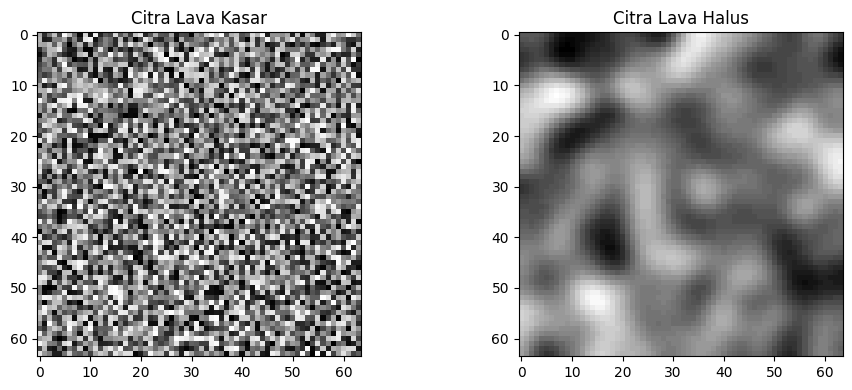

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate2d

# Buat "lava kasar" = tekstur acak
np.random.seed(0)
lava_kasar = np.random.randint(0, 256, (64, 64))

# Buat "lava halus" = tekstur halus (pakai filter Gaussian ringan)
from scipy.ndimage import gaussian_filter
lava_halus = gaussian_filter(lava_kasar, sigma=3)

# Tampilkan kedua citra
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].imshow(lava_kasar, cmap='gray')
axs[0].set_title("Citra Lava Kasar")
axs[1].imshow(lava_halus, cmap='gray')
axs[1].set_title("Citra Lava Halus")
plt.tight_layout()
plt.show()


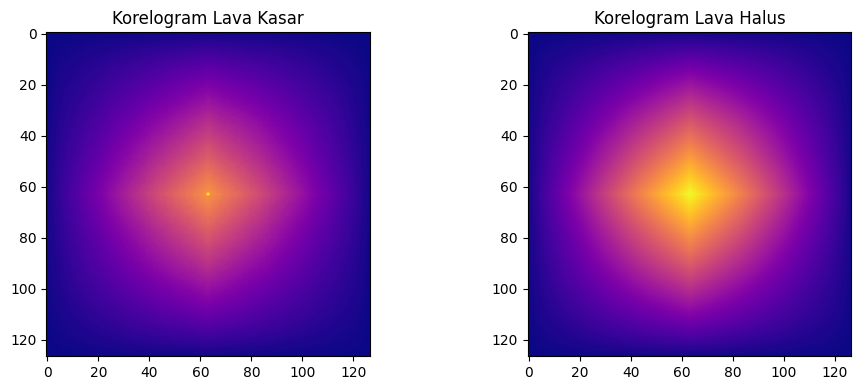

In [9]:
# Fungsi korelogram
def hitung_korelogram(data):
    return correlate2d(data, data, mode='full')

# Korelogram
corr_kasar = hitung_korelogram(lava_kasar)
corr_halus = hitung_korelogram(lava_halus)

# Tampilkan
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].imshow(corr_kasar, cmap='plasma')
axs[0].set_title("Korelogram Lava Kasar")
axs[1].imshow(corr_halus, cmap='plasma')
axs[1].set_title("Korelogram Lava Halus")
plt.tight_layout()
plt.show()


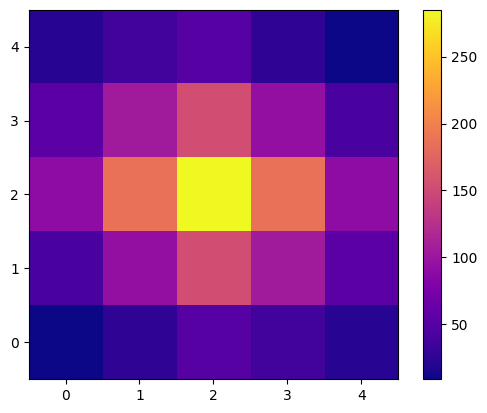

In [ ]:
## implementasi correlogram 2D dengan generate data random

import numpy as np 
import matplotlib.pyplot as plt 

# generate data random
data = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
    ])

# hitung correlogram 2D
rows, cols = data.shape
correlogram = np.zeros((2 * rows - 1, 2 * cols - 1))

for u in range(-(rows - 1), rows):
    for v in range(-(cols - 1), cols):
        sum = 0
        for i in range(rows):
            for j in range(cols):
                x_shift = i + u
                y_shift = j + v
                if 0 <= x_shift < rows and 0 <= y_shift < cols:
                    sum += data[i, j] * data[x_shift, y_shift]
        correlogram[u + rows - 1, v + cols - 1] = sum 


# plot correlogram 2D
plt.imshow(correlogram, cmap='plasma', origin='lower')
plt.colorbar()
plt.show()

Matriks 2D correlogram:
[[-2.4   -1.8   -1.05  -0.675 -0.3  ]
 [-0.9   -0.337  0.175  0.337  0.3  ]
 [ 0.5    0.825  1.     0.825  0.5  ]
 [ 0.3    0.337  0.175 -0.337 -0.9  ]
 [-0.3   -0.675 -1.05  -1.8   -2.4  ]]


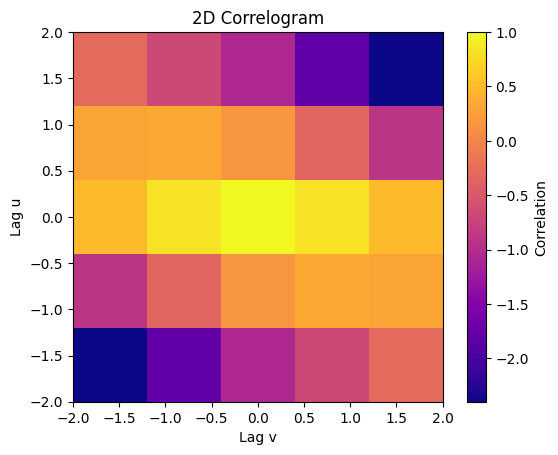

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 

# Data 2D
data = np.array([
    [1, 2, 4],
    [3, 5, 6],
    [7, 8, 9]
])

rows, colum = data.shape
correlogram = np.zeros((2 * rows - 1, 2 * colum - 1)) #Bentuk 2M-1, 2N-1

# Normalisasi
mean = np.mean(data)
variance = np.var(data)

for u in range(-(rows - 1), rows):
    for v in range(-(colum - 1), colum):
        sum_corr = 0
        count = 0
        for i in range(rows):
            for j in range(colum):
                x_shift = i + u
                y_shift = j + v
                if 0 <= x_shift < rows and 0 <= y_shift < colum:
                    sum_corr += (data[i, j] - mean) * (data[x_shift, y_shift] - mean)
                    count += 1
        if count > 0:
            correlogram[u + rows - 1, v + colum - 1] = sum_corr / (count * variance)

print("Matriks 2D correlogram:")
print(np.round(correlogram, 3))

# Plot hasil
plt.imshow(correlogram, cmap='plasma', origin='lower', extent=[-(colum-1), colum-1, -(rows-1), rows-1])
plt.title("2D Correlogram")
plt.xlabel("Lag v")
plt.ylabel("Lag u")
plt.colorbar(label="Correlation")
plt.grid(False)
plt.show()
